Project : Handwritten_Digit_Recognition

Intern Name : Janki Dobariya

In [1]:
import os

In [2]:
# Define the base folder name
base_folder = "Handwritten_Digit_Recognition"

# List of sub-folders inside the base folder
sub_folders = ["output", "notebooks", "results"]

In [3]:
# Create the base folder
if not os.path.exists(base_folder):
    os.makedirs(base_folder)

# Create sub-folders
for folder in sub_folders:
    path = os.path.join(base_folder, folder)
    if not os.path.exists(path):
        os.makedirs(path)

print(f"Folder structure created under: {base_folder}")

Folder structure created under: Handwritten_Digit_Recognition


In [4]:
for root, dirs, files in os.walk(base_folder):
    print(root)
    for name in dirs:
        print(f"  - {name}")

Handwritten_Digit_Recognition
  - notebooks
  - output
  - results
Handwritten_Digit_Recognition/notebooks
Handwritten_Digit_Recognition/output
Handwritten_Digit_Recognition/results


In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Save folder structure in Google Drive
drive_base = "/content/drive/My Drive/Handwritten_Digit_Recognition"
if not os.path.exists(drive_base):
    os.makedirs(drive_base)

# Copy base folder to Drive
!cp -r Handwritten_Digit_Recognition /content/drive/My\ Drive/
print("Folder structure saved to Google Drive.")

Mounted at /content/drive
Folder structure saved to Google Drive.


In [6]:
import shutil
shutil.make_archive(base_folder, 'zip', base_folder)

from google.colab import files
files.download(f"{base_folder}.zip")
print("Folder structure downloaded as ZIP.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Folder structure downloaded as ZIP.


In [7]:
for folder in sub_folders:
    path = os.path.join(base_folder, folder, ".placeholder")
    with open(path, "w") as f:
        f.write("")  # Empty content
print("Placeholder files added to empty folders.")

Placeholder files added to empty folders.


In [8]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display dataset properties
print(f"Training Data Shape: {X_train.shape}")  # (60000, 28, 28)
print(f"Test Data Shape: {X_test.shape}")  # (10000, 28, 28)
print(f"Unique Classes: {np.unique(y_train)}")  # Digits 0-9

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)
Unique Classes: [0 1 2 3 4 5 6 7 8 9]


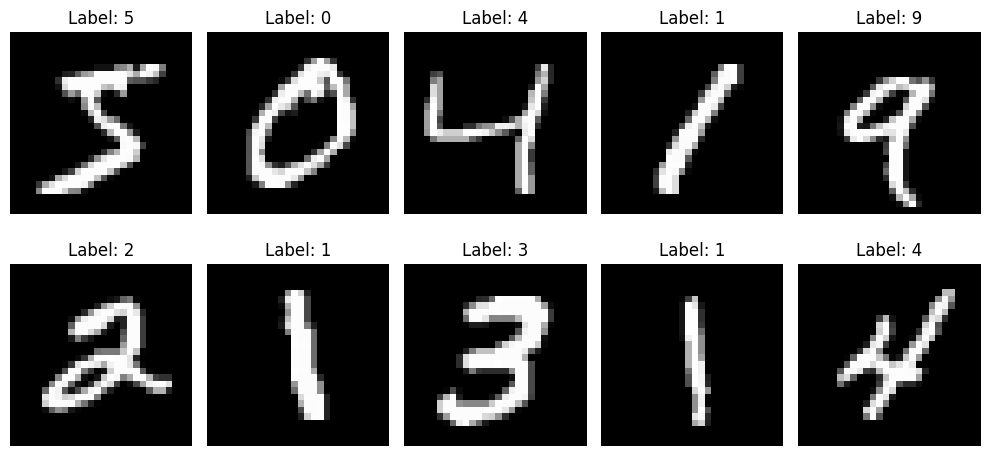

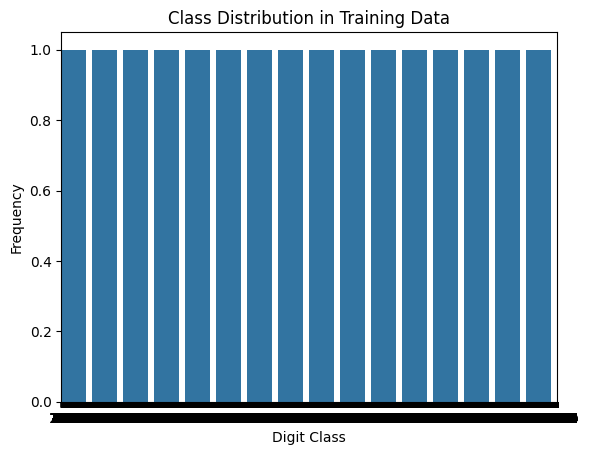

In [10]:
# Display sample images with labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot class distribution
sns.countplot(y_train)
plt.title("Class Distribution in Training Data")
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.show()

In [11]:
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape to include channel dimension (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(f"Training Data Shape After Reshaping: {X_train.shape}")


Training Data Shape After Reshaping: (60000, 28, 28, 1)


In [12]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"One-hot Encoded Labels Shape: {y_train.shape}")  # (60000, 10)

One-hot Encoded Labels Shape: (60000, 10)


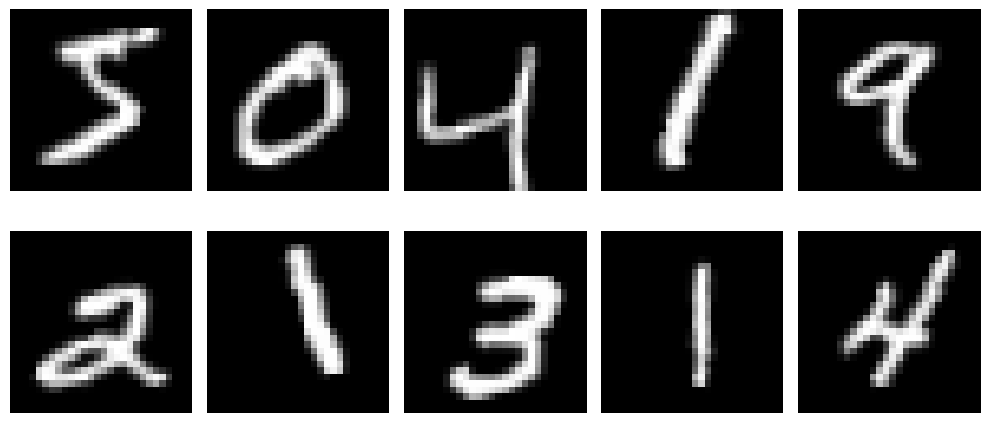

In [13]:
# Define ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=10,      # Random rotation
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1, # Vertical shift
    zoom_range=0.1          # Zoom
)

# Fit generator on training data
datagen.fit(X_train)

# Visualize augmented images
plt.figure(figsize=(10, 5))
for X_batch, _ in datagen.flow(X_train, y_train, batch_size=10, shuffle=False):
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    break  # Show one batch
plt.tight_layout()
plt.show()

In [14]:
# Save preprocessed data to output folder
output_folder = "/content/Handwritten_Digit_Recognition/output/"
os.makedirs(output_folder, exist_ok=True)

np.save(output_folder + "X_train.npy", X_train)
np.save(output_folder + "y_train.npy", y_train)
np.save(output_folder + "X_test.npy", X_test)
np.save(output_folder + "y_test.npy", y_test)

print("Preprocessed data saved successfully.")


Preprocessed data saved successfully.


In [15]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.astype("float32") / 255.0  # Normalize pixel values to [0, 1]
X_test = X_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encoding
y_test = to_categorical(y_test, 10)

# Define the MLP model
mlp_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image into a vector
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),   # Second hidden layer
    Dense(10, activation='softmax') # Output layer with 10 classes
])

# Compile the model
mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
mlp_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Save the model
mlp_model.save("/content/Handwritten_Digit_Recognition/output/mlp_model.h5")

# Evaluate the model
test_loss, test_acc = mlp_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8627 - loss: 0.4721 - val_accuracy: 0.9617 - val_loss: 0.1334
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9643 - loss: 0.1169 - val_accuracy: 0.9680 - val_loss: 0.1061
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9781 - loss: 0.0742 - val_accuracy: 0.9641 - val_loss: 0.1212
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9822 - loss: 0.0550 - val_accuracy: 0.9715 - val_loss: 0.1007
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9855 - loss: 0.0457 - val_accuracy: 0.9736 - val_loss: 0.0928
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9888 - loss: 0.0340 - val_accuracy: 0.9718 - val_loss: 0.1036
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9920 - loss: 0.0247 - val_accuracy: 0.9757 - val_loss: 0.0941
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9939 - loss: 0.019

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.1087
Test Accuracy: 0.98


In [16]:
# Import libraries
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

# Reshape data for CNN
X_train = X_train.reshape(-1, 28, 28, 1)  # Add channel dimension
X_test = X_test.reshape(-1, 28, 28, 1)

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First conv layer
    MaxPooling2D((2, 2)),  # Max pooling
    Dropout(0.25),  # Dropout for regularization
    Conv2D(64, (3, 3), activation='relu'),  # Second conv layer
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),  # Flatten to pass into Dense layers
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Save the model
cnn_model.save("/content/Handwritten_Digit_Recognition/output/cnn_model.h5")

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.8170 - loss: 0.5719 - val_accuracy: 0.9805 - val_loss: 0.0667
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.9645 - loss: 0.1215 - val_accuracy: 0.9854 - val_loss: 0.0476
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9734 - loss: 0.0867 - val_accuracy: 0.9877 - val_loss: 0.0413
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 38ms/step - accuracy: 0.9773 - loss: 0.0747 - val_accuracy: 0.9871 - val_loss: 0.0401
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9809 - loss: 0.0665 - val_accuracy: 0.9890 - val_loss: 0.0384
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.9829 - loss: 0.0572 - val_accuracy: 0.9900 - val_loss: 0.0346
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.9831 - loss: 0.0572 - val_accuracy: 0.9893 - val_loss: 0.0361
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9851 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9887 - loss: 0.0347
Test Accuracy: 0.99


In [17]:
# Define the LeNet model
lenet_model = Sequential([
    Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)),  # First conv layer
    MaxPooling2D((2, 2)),  # First pooling layer
    Conv2D(16, (5, 5), activation='tanh'),  # Second conv layer
    MaxPooling2D((2, 2)),  # Second pooling layer
    Flatten(),  # Flatten for Dense layers
    Dense(120, activation='tanh'),  # First fully connected layer
    Dense(84, activation='tanh'),  # Second fully connected layer
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
lenet_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
lenet_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Save the model
lenet_model.save("/content/Handwritten_Digit_Recognition/output/lenet_model.h5")

# Evaluate the model
test_loss, test_acc = lenet_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8739 - loss: 0.4148 - val_accuracy: 0.9749 - val_loss: 0.0830
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9790 - loss: 0.0716 - val_accuracy: 0.9780 - val_loss: 0.0736
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9850 - loss: 0.0471 - val_accuracy: 0.9827 - val_loss: 0.0594
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9887 - loss: 0.0347 - val_accuracy: 0.9823 - val_loss: 0.0619
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9910 - loss: 0.0284 - val_accuracy: 0.9798 - val_loss: 0.0684
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9932 - loss: 0.0211 - val_accuracy: 0.9850 - val_loss: 0.0519
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9823 - val_loss: 0.0624
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9956 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9828 - loss: 0.0588
Test Accuracy: 0.99


In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data pipeline function
def create_data_pipeline(train_images, train_labels, batch_size=32):
    """
    Creates a data pipeline with data augmentation using ImageDataGenerator.

    Arguments:
    - train_images: Training image data (numpy array)
    - train_labels: Training labels (numpy array)
    - batch_size: Batch size for training (default is 32)

    Returns:
    - train_generator: A generator for the training data
    """

    # Define data augmentation steps
    datagen = ImageDataGenerator(
        rotation_range=10,      # Rotate images by up to 10 degrees
        width_shift_range=0.1,  # Shift images horizontally by up to 10%
        height_shift_range=0.1, # Shift images vertically by up to 10%
        zoom_range=0.1,         # Zoom images by up to 10%
        shear_range=0.1,        # Shear images by up to 10%
        horizontal_flip=True,   # Randomly flip images horizontally
        fill_mode='nearest'     # Fill pixels that are missing after transformations
    )

    # Fit the data generator to the training data
    datagen.fit(train_images)

    # Return the data generator
    return datagen.flow(train_images, train_labels, batch_size=batch_size)


In [30]:
%%writefile datapipeline.py
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data pipeline function
def create_data_pipeline(train_images, train_labels, batch_size=32):
    """
    Creates a data pipeline with data augmentation using ImageDataGenerator.

    Arguments:
    - train_images: Training image data (numpy array)
    - train_labels: Training labels (numpy array)
    - batch_size: Batch size for training (default is 32)

    Returns:
    - train_generator: A generator for the training data
    """

    # Define data augmentation steps
    datagen = ImageDataGenerator(
        rotation_range=10,      # Rotate images by up to 10 degrees
        width_shift_range=0.1,  # Shift images horizontally by up to 10%
        height_shift_range=0.1, # Shift images vertically by up to 10%
        zoom_range=0.1,         # Zoom images by up to 10%
        shear_range=0.1,        # Shear images by up to 10%
        horizontal_flip=True,   # Randomly flip images horizontally
        fill_mode='nearest'     # Fill pixels that are missing after transformations
    )

    # Fit the data generator to the training data
    datagen.fit(train_images)

    # Return the data generator
    return datagen.flow(train_images, train_labels, batch_size=batch_size)


Writing datapipeline.py


In [31]:
# main.py
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datapipeline import create_data_pipeline  # Import your data pipeline from datapipeline.py

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the images to (28, 28, 1) to match the input expected by CNNs (grayscale images)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize the pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
    zoom_range=0.1,         # Zoom images by up to 10%
    shear_range=0.1,        # Shear images by up to 10%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill pixels that are missing after transformations
)

# Fit the data generator to the training data
datagen.fit(train_images)

# Create the model - CNN (Convolutional Neural Network)
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 output classes for MNIST digits
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create MLP Model
def create_mlp_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')  # 10 output classes for MNIST digits
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create LeNet Model
def create_lenet_model():
    model = Sequential([
        Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(16, (5, 5), activation='tanh'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(120, activation='tanh'),
        Dense(84, activation='tanh'),
        Dense(10, activation='softmax')  # 10 output classes for MNIST digits
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Select the model you want to train
model = create_cnn_model()  # You can change this to create_mlp_model() or create_lenet_model()

# Train the model using the data pipeline
train_generator = create_data_pipeline(train_images, train_labels)

# Fit the model
model.fit(train_generator, epochs=10, steps_per_epoch=len(train_images) // 32)

# Save the trained model
model.save('output/trained_model.h5')
print("Model training complete and saved.")

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


Epoch 1/10
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 48:09 2s/step - accuracy: 0.0312 - loss: 2.3210

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.6707 - loss: 0.9683
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 4:43 151ms/step - accuracy: 0.8750 - loss: 0.3855

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.8961 - loss: 0.3324
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 44ms/step - accuracy: 0.9248 - loss: 0.2447
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 44ms/step - accuracy: 0.9399 - loss: 0.2023
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9463 - loss: 0.1775
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


Model training complete and saved.
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9768 - loss: 0.0659
Test Accuracy: 0.9825000166893005
